# FISH - Pipeline - A Python interactive notebook to process FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Notebook summary 


- Load a directory with microscope FISH images
- Establish a connection to Network-attached storage (NAS) using [pysmb](https://github.com/miketeo/pysmb)
- Perform cell segmentation using [Cellpose](https://github.com/MouseLand/cellpose)
- Perform spot detection using [Big-FISH](https://github.com/fish-quant/big-fish)
- Datamanagement using Pandas

----

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

In [3]:
fa.Banner().print_banner()

 
FISH processing repository by : 
Luis U. Aguilera, Joshua Cook, Tim Stasevich, and Brian Munsky. 
 ____________________________________________________________  
|                      ,#^^^^^^^%&&&                         | 
|  .&.                 &.           ,&&&___                  | 
|  &  &         ___&&&/                    (&&&&____         | 
|  &    &,____#&                   .       #.       %&**,    | 
|  /(                  &         ,%       &       %     ,&   | 
|    &          &.                       %.      %&%     &*  | 
|     &&         *         .%            &             &(    | 
|   &                &(           ,#     .%             ,.&  | 
|  &    _&&__#&.     &&           &.      ,&         ,%&     | 
|  &  (%        #&,___                      (-***%&%^        | 
|  & &                %&&&(,.      .*#&&&&&%.                | 
|                          &    ,%%%%                        | 
|___________________________/%%^_____________________________| 



----

# Parameters defined by the user 

----

### Paths to images

In [4]:
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')
# Path to images and masks
#data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_75min')
#path_to_masks_dir = None 

data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20230306/DUSP1_0nM_Dex_0min_012623')
path_to_masks_dir = None 


### Parameters for segmentation and spot detection

In [5]:
diameter_nucleus=100                         # Approximate nucleus size in pixels
diameter_cytosol=200                         # Approximate cytosol size in pixels
psf_z=350                                    # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers
psf_yx=160                                   # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers
voxel_size_z=500                             # Microscope conversion px to nanometers in the z axis.
voxel_size_yx=160                            # Microscope conversion px to nanometers in the xy axis.
channels_with_nucleus= [2]                    # Channel to pass to python for nucleus segmentation
channels_with_cytosol=None#[1]                    # Channel to pass to python for cytosol segmentation
channels_with_FISH=[0]                       # Channel to pass to python for spot detection
optimization_segmentation_method='z_slice_segmentation' # optimization_segmentation_method = 'intensity_segmentation' 'z_slice_segmentation', 'gaussian_filter_segmentation' , None
save_all_images=0                            # To save all images for all the z-slices
save_filtered_images = False                 # To save filtered images.
number_of_images_to_process =  1             # Use an integer to process a subset of images. None is used to indicate that all images need to be processed.
minimum_spots_cluster = 4                    # Minimal value used to define a cluster.
threshold_for_spot_detection=None            # To select an specific threshold for spot detection. The default is None, and use automated threshold detection.
show_plots=0                                 #
send_data_to_NAS=0                           # If data sent back to NAS use 1
download_data_from_NAS=1                     # If data downloaded from NAS use 1

## Downloading data from NAS

In [6]:
# Download data from NAS
local_data_dir, masks_dir, _, _, list_files_names = fa.Utilities.read_images_from_folder( path_to_config_file, data_folder_path, 
                                                                        path_to_masks_dir,  download_data_from_NAS)


Connection established
File Downloaded : ROI017_XY1678131751_Z00_T0_C1.tif
File Downloaded : ROI022_XY1678131756_Z00_T0_C0.tif
File Downloaded : ROI008_XY1678130393_Z00_T0_C2.tif
File Downloaded : ROI018_XY1678131752_Z00_T0_C1.tif
File Downloaded : ROI020_XY1678131754_Z00_T0_C0.tif
File Downloaded : ROI025_XY1678131759_Z00_T0_C2.tif
File Downloaded : ROI011_XY1678130396_Z00_T0_C1.tif
File Downloaded : ROI004_XY1678130389_Z00_T0_C2.tif
File Downloaded : ROI016_XY1678131750_Z00_T0_C2.tif
File Downloaded : ROI006_XY1678130391_Z00_T0_C1.tif
File Downloaded : ROI027_XY1678131761_Z00_T0_C0.tif
File Downloaded : ROI019_XY1678131753_Z00_T0_C2.tif
File Downloaded : ROI028_XY1678131762_Z00_T0_C0.tif
File Downloaded : ROI001_XY1678130386_Z00_T0_C1.tif
File Downloaded : ROI024_XY1678131758_Z00_T0_C1.tif
File Downloaded : ROI030_XY1678131764_Z00_T0_C1.tif
File Downloaded : ROI014_XY1678130399_Z00_T0_C2.tif
File Downloaded : ROI011_XY1678130396_Z00_T0_C0.tif
File Downloaded : ROI020_XY1678131754_Z00

## Running the pipeline

----

In [7]:
dataframe_FISH,_,_,_,output_identification_string = fa.PipelineFISH(local_data_dir, channels_with_cytosol, channels_with_nucleus, channels_with_FISH,diameter_nucleus, 
                                       diameter_cytosol, minimum_spots_cluster, masks_dir=masks_dir,  voxel_size_z=voxel_size_z,
                                       voxel_size_yx=voxel_size_yx ,psf_z=psf_z,psf_yx=psf_yx, show_plots=show_plots,  
                                       file_name_str =data_folder_path.name, optimization_segmentation_method = optimization_segmentation_method,
                                       save_all_images=save_all_images,threshold_for_spot_detection=threshold_for_spot_detection,save_filtered_images=save_filtered_images,
                                       number_of_images_to_process=number_of_images_to_process).run()

Folder name:  DUSP1_0nM_Dex_0min_012623___nuc_100__cyto_200__psfz_350__psfyx_160__ts_None
 ############### 
       IMAGE : 0
 ############### 
 
ORIGINAL IMAGE
ROI001_XY1678130386_Z00_T0_merged.tif
CELL SEGMENTATION
SPOT DETECTION
Spot Detection for Channel : 0
sigma_value (z,y,x) = (0.7, 1.0, 1.0)
Int threshold used for the detection of spots:  272.0
not showing elbow plot
Z-Slice:  13
CREATING THE PLOT WITH ORIGINAL IMAGES
CREATING THE PLOT WITH ALL CELL IMAGES
CREATING THE METADATA FILE
CREATING THE PDF REPORT


## Extracting data from the dataframe

----

In [8]:
# Be aware that the code keeps track of cells without spots. In the data frame, the fields for cells without spots are populated with -1 values.
dataframe_FISH.tail()

,image_id,cell_id,spot_id,nuc_loc_y,nuc_loc_x,cyto_loc_y,cyto_loc_x,nuc_area_px,cyto_area_px,cell_area_px,...,is_cell_fragmented,nuc_int_ch_0,nuc_int_ch_1,nuc_int_ch_2,cyto_int_ch_0,cyto_int_ch_1,cyto_int_ch_2,spot_int_ch_0,spot_int_ch_1,spot_int_ch_2
740,0,12,35,0,0,801,530,0,15776,15776,...,1,0.0,0.0,0.0,763.2442,839.8499,1007.7398,12349.933333,-47.066667,27.266667
741,0,12,36,0,0,801,530,0,15776,15776,...,1,0.0,0.0,0.0,763.2442,839.8499,1007.7398,12349.933333,-47.066667,27.266667
742,0,12,37,0,0,801,530,0,15776,15776,...,1,0.0,0.0,0.0,763.2442,839.8499,1007.7398,11246.733333,144.666667,22.866667
743,0,12,38,0,0,801,530,0,15776,15776,...,1,0.0,0.0,0.0,763.2442,839.8499,1007.7398,12349.933333,-47.066667,27.266667
744,0,12,39,0,0,801,530,0,15776,15776,...,1,0.0,0.0,0.0,763.2442,839.8499,1007.7398,11246.733333,144.666667,22.866667


## Plots

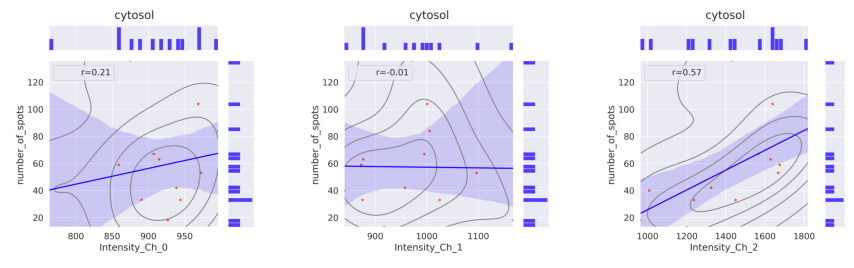

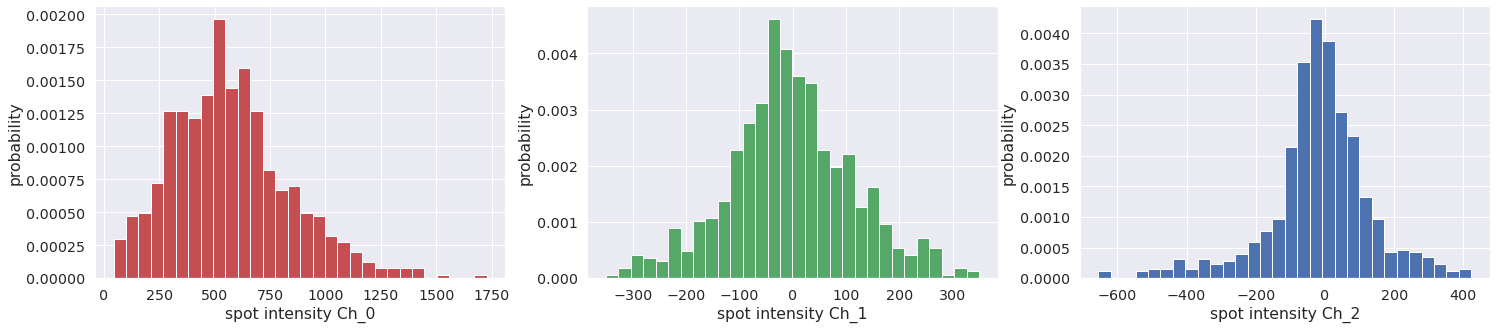

<Figure size 432x288 with 0 Axes>

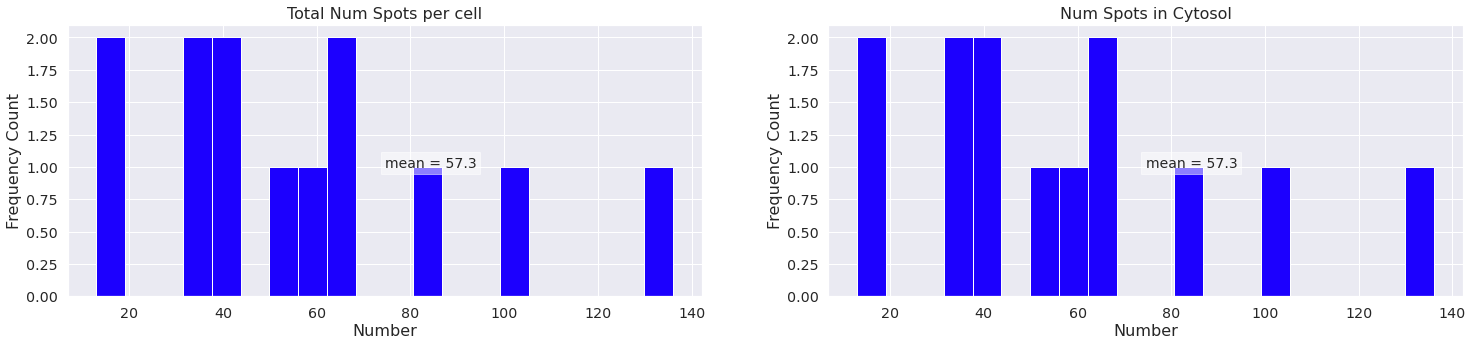

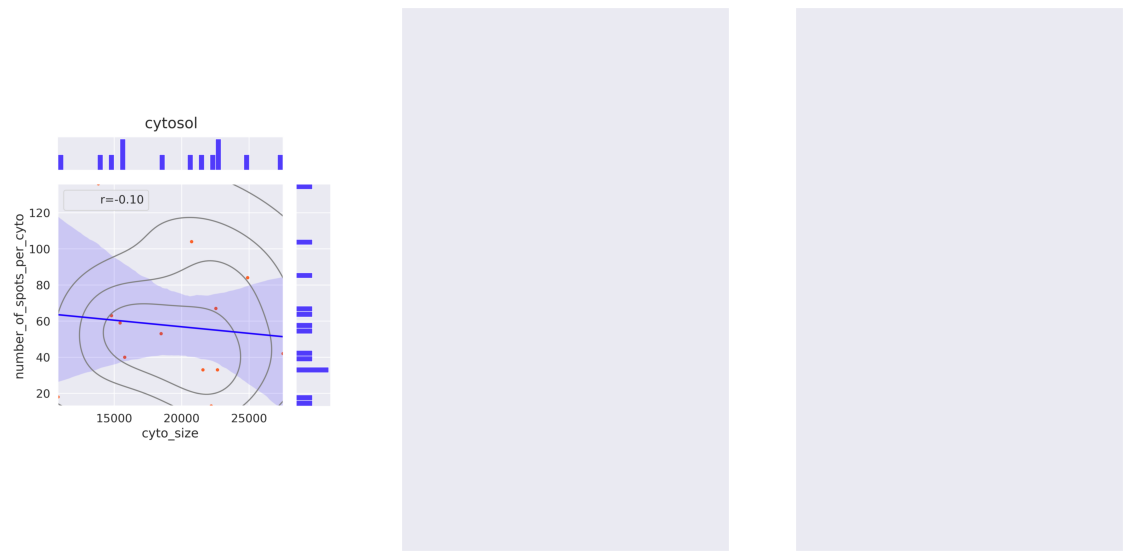

In [9]:
list_files_distributions = fa.Plots.plot_all_distributions (dataframe_FISH,channels_with_cytosol, channels_with_nucleus,channels_with_FISH,minimum_spots_cluster,output_identification_string )

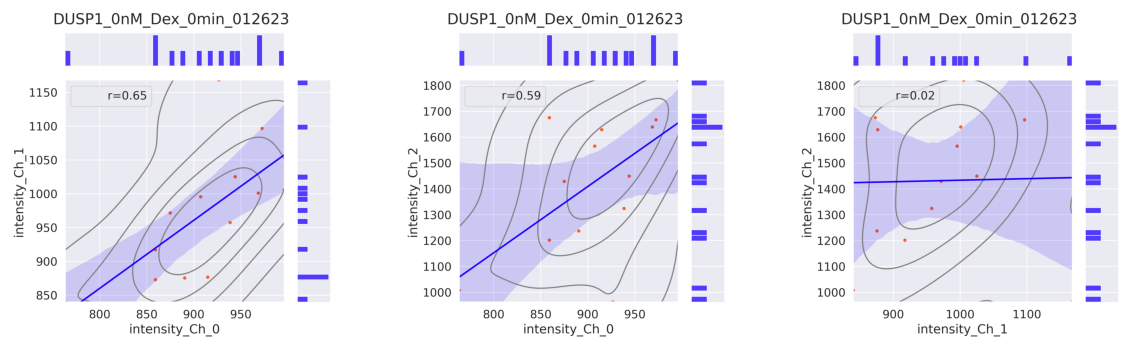

In [10]:
file_plots_bleed_thru = fa.Plots.plot_scatter_bleed_thru(dataframe_FISH, channels_with_cytosol, channels_with_nucleus,output_identification_string)

## Saving data

In [11]:
# Saving data and plots, and sending data to NAS
fa.Utilities.save_output_to_folder(output_identification_string, data_folder_path, list_files_distributions=list_files_distributions,
                                   file_plots_bleed_thru=file_plots_bleed_thru,channels_with_FISH=channels_with_FISH)

# sending data to NAS
analysis_folder_name, mask_dir_complete_name = fa.Utilities.sending_data_to_NAS(output_identification_string, data_folder_path, path_to_config_file, path_to_masks_dir, diameter_nucleus, diameter_cytosol, send_data_to_NAS, masks_dir)

# Moving the complete analysis folder to final analyses folder 
fa.Utilities.move_results_to_analyses_folder( output_identification_string, data_folder_path, mask_dir_complete_name, path_to_masks_dir, save_filtered_images, download_data_from_NAS )